#HOMEWORK 4
Classifying MNIST using Multi-Layer Perceptron (MLP)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
# Build an MLP model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model, choose optimizer, loss and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model and save the history. Define epochs, batch_size and validation_split
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 8s 18ms/step - loss: 0.2550 - accuracy: 0.9256 - val_loss: 0.1217 - val_accuracy: 0.9638
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0931 - accuracy: 0.9720 - val_loss: 0.0886 - val_accuracy: 0.9732
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.0835 - val_accuracy: 0.9738
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0832 - val_accuracy: 0.9754
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0823 - val_accuracy: 0.9765
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.0897 - val_accuracy: 0.9758
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.1085 - val_accuracy: 0.9712

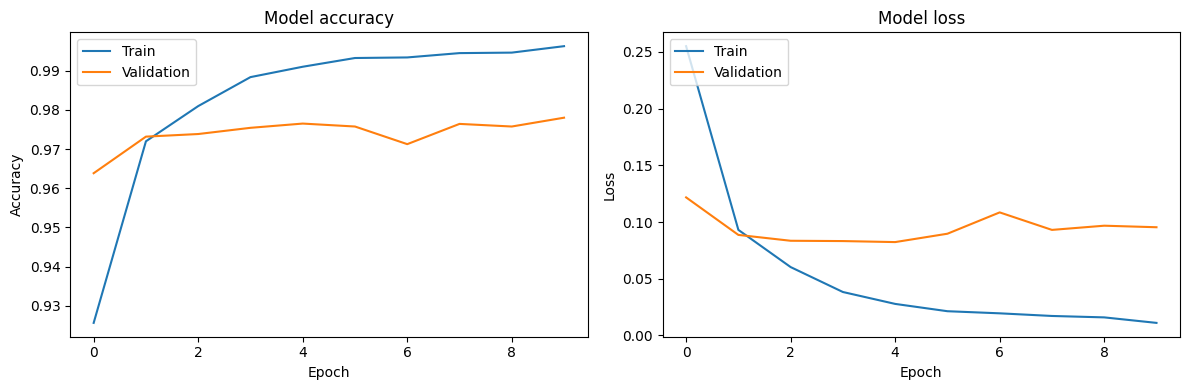

In [ ]:
# Plot training & validation accuracy values and loss values per epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on the test set and report test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 2s - loss: 0.0889 - accuracy: 0.9786 - 2s/epoch - 6ms/step

Test accuracy: 0.978600025177002


In [ ]:
# Explore the impact of different hyper-parameters e.g. number of hidden layers on training and testing performance
for i in range(1, 6):  # for 1 to 5 hidden layers
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(i):
        model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy with {i} hidden layer(s):', test_acc)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.3007 - accuracy: 0.9153 - val_loss: 0.1525 - val_accuracy: 0.9549
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1241 - accuracy: 0.9636 - val_loss: 0.1158 - val_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0802 - accuracy: 0.9768 - val_loss: 0.0941 - val_accuracy: 0.9723
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0571 - accuracy: 0.9831 - val_loss: 0.0898 - val_accuracy: 0.9722
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0408 - accuracy: 0.9887 - val_loss: 0.0826 - val_accuracy: 0.9758
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0315 - accuracy: 0.9912 - val_loss: 0.0830 - val_accuracy: 0.9743
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0234 - accuracy: 0.9940 - val_loss: 0.0877 - val_accuracy: 0.9739

KeyboardInterrupt: 

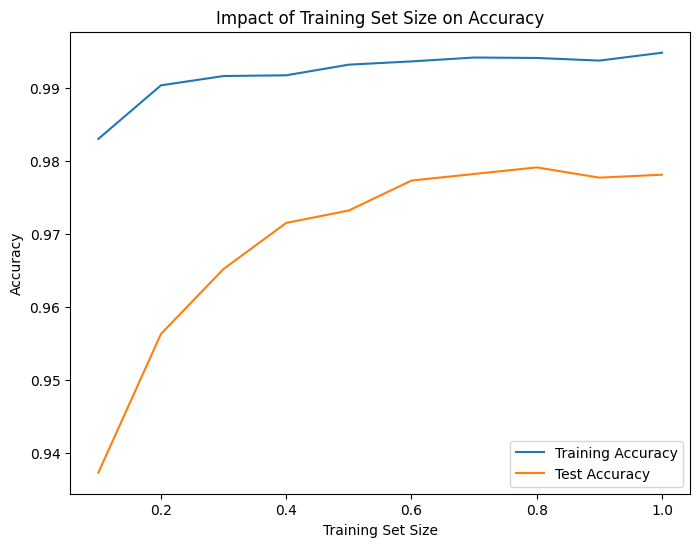

In [ ]:
# Explore the impact of training set size on training and testing performance (keep the same testing set while varying the training set)
import numpy as np
# Define the sizes of the training sets you want to explore
training_set_sizes = np.linspace(0.1, 1.0, 10)  # e.g., 10% to 100% of the data

# Initialize lists to store the results
train_accuracies = []
test_accuracies = []

for size in training_set_sizes:
    # Determine the number of samples to include in the training set
    num_samples = int(size * len(train_images))

    # Create the smaller training set
    small_train_images = train_images[:num_samples]
    small_train_labels = train_labels[:num_samples]

    # Create a new model
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the smaller training set
    model.fit(small_train_images, small_train_labels, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    # Evaluate the model on the training set and the test set
    train_loss, train_acc = model.evaluate(small_train_images, small_train_labels, verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    # Store the results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(training_set_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_set_sizes, test_accuracies, label='Test Accuracy')
plt.title('Impact of Training Set Size on Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()